In [1]:
import networkx as nx

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
E = pd.read_json('data/TMT_AUD_EdgeList.json')
E.head()

,Anchored,DeltaInMonths,Direction,ESGVersionID,EconAssetOverride,Optional,RootID,SubModelNameOverride,ToolModelName,source,target,value
0,1,0,O,NULL,NULL,0,29839,NULL,Econ.NYC.MonLMM.YC,10114686,20214833,1
1,1,-48,I,NULL,NULL,1,30913,NULL,MarketData.Bonds.Government,2027805,10114686,1
2,1,0,I,NULL,NULL,0,21962,NULL,Econ.NYC.Ext2FBK.YC,20211800,10114692,1
3,1,0,I,NULL,NULL,0,21959,NULL,Econ.NYC.Ext2FBK,20211563,10114692,1
4,1,0,O,NULL,NULL,0,21961,NULL,Econ.NYC.Ext2FBK.TP.TVTP,10114692,20211799,1


In [5]:
N = pd.read_json('data/TMT_AUD_NodeList.json')
N = N.set_index(['id'])
N.head()

,CalibrationType,CurveType,Economy,EquityAsset,Name,NodeType,RootID,Stream,SubModel,group
id,,,,,,,,,,
20236,Market Consistent,Swaps,AUD,NONE,Econ.NYC.Ext2FBK.YC,Model,36,NYC_Market,NULL,202
20237,Market Consistent,Swaps,AUD,NONE,Econ.NYC.SemiAnnLMM.YC,Model,37,NYC_Market,NULL,202
20238,Market Consistent,Swaps,AUD,NONE,Econ.NYC.MonLMM.YC,Model,38,NYC_Market,NULL,202
20239,Market Consistent,Swaps,AUD,NONE,Econ.NYC.AnnLMM.YC,Model,39,NYC_Market,NULL,202
20240,Market Consistent,Swaps,AUD,NONE,Econ.NYC.Ext2FBK.QlyYC,Model,40,NYC_Market,NULL,202


C:\Users\stewarca\AppData\Local\Continuum\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\stewarca\AppData\Local\Continuum\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\stewarca\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\stewarca\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: 

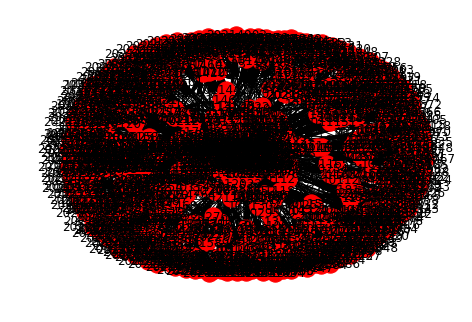

In [6]:
TG = nx.from_pandas_dataframe(E,'source','target',create_using=nx.DiGraph(),edge_attr=['RootID','ToolModelName','Anchored','DeltaInMonths','Direction','ESGVersionID','EconAssetOverride','SubModelNameOverride','value'])

nx.draw_spring(TG,with_labels=True)
plt.show()

In [7]:
TG.edges(data=True)

[(10114686,
  20214833,
  {'Anchored': 1,
   'DeltaInMonths': 0,
   'Direction': 'O',
   'ESGVersionID': 'NULL',
   'EconAssetOverride': 'NULL',
   'RootID': 29839,
   'SubModelNameOverride': 'NULL',
   'ToolModelName': 'Econ.NYC.MonLMM.YC',
   'value': 1}),
 (10114686,
  20214828,
  {'Anchored': 1,
   'DeltaInMonths': 0,
   'Direction': 'O',
   'ESGVersionID': 'NULL',
   'EconAssetOverride': 'NULL',
   'RootID': 29833,
   'SubModelNameOverride': 'NULL',
   'ToolModelName': 'Econ.NYC.Ext2FBK.QlyYC',
   'value': 1}),
 (10114686,
  20214830,
  {'Anchored': 1,
   'DeltaInMonths': 0,
   'Direction': 'O',
   'ESGVersionID': 'NULL',
   'EconAssetOverride': 'NULL',
   'RootID': 29835,
   'SubModelNameOverride': 'NULL',
   'ToolModelName': 'Econ.NYC.Ext2FBK.SemiAnnYC',
   'value': 1}),
 (10114686,
  20214826,
  {'Anchored': 1,
   'DeltaInMonths': 0,
   'Direction': 'O',
   'ESGVersionID': 'NULL',
   'EconAssetOverride': 'NULL',
   'RootID': 29831,
   'SubModelNameOverride': 'NULL',
   'ToolMod

In [8]:
#Bipartite on this attribute
nx.set_node_attributes(TG, 'NodeType', pd.Series(N.NodeType).to_dict())

nx.set_node_attributes(TG, 'CalibrationType', pd.Series(N.CalibrationType).to_dict())
nx.set_node_attributes(TG, 'CurveType', pd.Series(N.CurveType).to_dict())
nx.set_node_attributes(TG, 'Economy', pd.Series(N.Economy).to_dict())
nx.set_node_attributes(TG, 'EquityAsset', pd.Series(N.EquityAsset).to_dict())
nx.set_node_attributes(TG, 'Name', pd.Series(N.Name).to_dict())
nx.set_node_attributes(TG, 'RootID', pd.Series(N.RootID).to_dict())
nx.set_node_attributes(TG, 'Stream', pd.Series(N.Stream).to_dict())
nx.set_node_attributes(TG, 'SubModel', pd.Series(N.SubModel).to_dict())

In [9]:
TG.nodes(data=True)

[(10114686,
  {'CalibrationType': 'Market Consistent',
   'CurveType': 'Government Bonds',
   'Economy': 'AUD',
   'EquityAsset': 'NONE',
   'Name': 'YCB',
   'NodeType': 'Tool',
   'RootID': 14686,
   'Stream': 'Backdated_4Y',
   'SubModel': 'NULL'}),
 (20214833,
  {'CalibrationType': 'Market Consistent',
   'CurveType': 'Government Bonds',
   'Economy': 'AUD',
   'EquityAsset': 'NONE',
   'Name': 'Econ.NYC.MonLMM.YC',
   'NodeType': 'Model',
   'RootID': 14833,
   'Stream': 'Backdated_4Y',
   'SubModel': 'NULL'}),
 (2027805,
  {'CalibrationType': 'Market Consistent',
   'CurveType': 'Government Bonds',
   'Economy': 'AUD',
   'EquityAsset': 'NONE',
   'Name': 'MarketData.Bonds.Government',
   'NodeType': 'Model',
   'RootID': 7805,
   'Stream': 'B+H_Standard',
   'SubModel': 'NULL'}),
 (20211800,
  {'CalibrationType': 'Market Consistent',
   'CurveType': 'Government Bonds',
   'Economy': 'AUD',
   'EquityAsset': 'NONE',
   'Name': 'Econ.NYC.Ext2FBK.YC',
   'NodeType': 'Model',
   'Ro

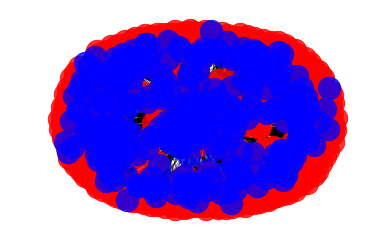

In [10]:
modelNodes = [n for n, d in TG.nodes(data=True) if d['NodeType'] == 'Model']
toolNodes = [n for n, d in TG.nodes(data=True) if d['NodeType'] == 'Tool']

pos=nx.spring_layout(TG) # positions for all nodes

nx.draw_networkx_nodes(TG,pos,
                       nodelist=modelNodes,
                       node_color='r',
                       node_size=500,
                   alpha=0.8)
nx.draw_networkx_nodes(TG,pos,
                       nodelist=toolNodes,
                       node_color='b',
                       node_size=500,
                   alpha=0.8)

nx.draw_networkx_edges(TG,pos,width=1.0,alpha=0.5)

plt.axis('off')
plt.show() # display

In [11]:
nx.is_directed_acyclic_graph(TG)

True

In [12]:
nx.is_bipartite(TG)

True

## Applying Graph Functions

In [13]:
## Accessing a single node
TG.node[10112689]

{'CalibrationType': 'Market Consistent',
 'CurveType': 'Swaps',
 'Economy': 'AUD',
 'EquityAsset': 'NONE',
 'Name': 'G2Credit',
 'NodeType': 'Tool',
 'RootID': 12689,
 'Stream': 'SolvencyII',
 'SubModel': 'NULL'}

In [19]:
# Successors of a tool - i.e. its output models
[TG.node[n] for n in TG.successors(10112689)]

[{'CalibrationType': 'Market Consistent',
  'CurveType': 'Swaps',
  'Economy': 'AUD',
  'EquityAsset': 'NONE',
  'Name': 'Econ.Credit.CreditG2.StochDriver',
  'NodeType': 'Model',
  'RootID': 18198,
  'Stream': 'Old_SII_CreditG2',
  'SubModel': 'NULL'}]

In [15]:
# Predecessors to a tool - i.e. it's input models
[TG.node[n] for n in TG.predecessors(10112689)]

[{'CalibrationType': 'Real World',
  'CurveType': 'Government Bonds',
  'Economy': 'ALL',
  'EquityAsset': 'NONE',
  'Name': 'Econ.Credit.CreditG2',
  'NodeType': 'Model',
  'RootID': 12021,
  'Stream': 'B+H_Standard',
  'SubModel': 'FEA_VolTargets'},
 {'CalibrationType': 'Real World',
  'CurveType': 'Government Bonds',
  'Economy': 'ALL',
  'EquityAsset': 'NONE',
  'Name': 'Econ.Credit.CreditG2.StochDriver',
  'NodeType': 'Model',
  'RootID': 12022,
  'Stream': 'B+H_Standard',
  'SubModel': 'FEA_VolTargets'},
 {'CalibrationType': 'Market Consistent',
  'CurveType': 'Swaps',
  'Economy': 'AUD',
  'EquityAsset': 'NONE',
  'Name': 'Econ.NYC.Ext2FBK.YC',
  'NodeType': 'Model',
  'RootID': 5464,
  'Stream': 'SolvencyII',
  'SubModel': 'NULL'},
 {'CalibrationType': 'Market Consistent',
  'CurveType': 'Government Bonds',
  'Economy': 'AUD',
  'EquityAsset': 'NONE',
  'Name': 'Econ.NYC.Ext2FBK.YC',
  'NodeType': 'Model',
  'RootID': 463,
  'Stream': 'NYC_Market',
  'SubModel': 'NULL'}]

In [16]:
## All models that are contributors to the current tool
[TG.node[n] for n in nx.ancestors(TG,10112689) if TG.node[n]['NodeType'] == 'Model' ]

[{'CalibrationType': 'Real World',
  'CurveType': 'Government Bonds',
  'Economy': 'ALL',
  'EquityAsset': 'NONE',
  'Name': 'Assumptions.RateLevels',
  'NodeType': 'Model',
  'RootID': 11522,
  'Stream': 'B+H_Standard',
  'SubModel': 'NULL'},
 {'CalibrationType': 'Market Consistent',
  'CurveType': 'Government Bonds',
  'Economy': 'AUD',
  'EquityAsset': 'NONE',
  'Name': 'MarketData.Bonds.Government',
  'NodeType': 'Model',
  'RootID': 7805,
  'Stream': 'B+H_Standard',
  'SubModel': 'NULL'},
 {'CalibrationType': 'Market Consistent',
  'CurveType': 'Swaps',
  'Economy': 'AUD',
  'EquityAsset': 'NONE',
  'Name': 'MarketData.RawSwaps',
  'NodeType': 'Model',
  'RootID': 15838,
  'Stream': 'B+H_Standard',
  'SubModel': 'NULL'},
 {'CalibrationType': 'Market Consistent',
  'CurveType': 'Government Bonds',
  'Economy': 'AUD',
  'EquityAsset': 'NONE',
  'Name': 'Econ.NYC.Ext2FBK.YC',
  'NodeType': 'Model',
  'RootID': 463,
  'Stream': 'NYC_Market',
  'SubModel': 'NULL'},
 {'CalibrationType':

In [17]:
## All tools that are contributors to the current tool
[TG.node[n] for n in nx.ancestors(TG,10112689) if TG.node[n]['NodeType'] == 'Tool' ]

[{'CalibrationType': 'Market Consistent',
  'CurveType': 'Government Bonds',
  'Economy': 'AUD',
  'EquityAsset': 'NONE',
  'Name': 'Government Bond Calby Push',
  'NodeType': 'Tool',
  'RootID': 12516,
  'Stream': 'B+H_Standard',
  'SubModel': 'NULL'},
 {'CalibrationType': 'Market Consistent',
  'CurveType': 'Government Bonds',
  'Economy': 'AUD',
  'EquityAsset': 'NONE',
  'Name': 'YCB',
  'NodeType': 'Tool',
  'RootID': 97,
  'Stream': 'NYC_Market',
  'SubModel': 'NULL'},
 {'CalibrationType': 'Market Consistent',
  'CurveType': 'Swaps',
  'Economy': 'AUD',
  'EquityAsset': 'NONE',
  'Name': 'Swaps Calby Push',
  'NodeType': 'Tool',
  'RootID': 15631,
  'Stream': 'B+H_Standard',
  'SubModel': 'NULL'},
 {'CalibrationType': 'Market Consistent',
  'CurveType': 'Swaps',
  'Economy': 'AUD',
  'EquityAsset': 'NONE',
  'Name': 'SWYCB',
  'NodeType': 'Tool',
  'RootID': 488,
  'Stream': 'SolvencyII',
  'SubModel': 'NULL'},
 {'CalibrationType': 'Market Consistent',
  'CurveType': 'Swaps',
  '

In [85]:
## All downstream nodes of the current tool (it does not appear to be used anywhere else downstream)
[TG.node[n] for n in nx.descendants(TG,10112689)]

[{'CalibrationType': 'Market Consistent',
  'CurveType': 'Swaps',
  'Economy': 'AUD',
  'EquityAsset': 'NONE',
  'Name': 'Econ.Credit.CreditG2.StochDriver',
  'NodeType': 'Model',
  'RootID': 18198,
  'Stream': 'Old_SII_CreditG2',
  'SubModel': 'NULL'}]

In [87]:
## Find the path between the Govt Bond assumptions and the SII tool
## As the network is directed, the upstream model must be the source

[TG.node[n] for n in nx.shortest_path(TG, source=20211522,target=20218198)]

[{'CalibrationType': 'Real World',
  'CurveType': 'Government Bonds',
  'Economy': 'ALL',
  'EquityAsset': 'NONE',
  'Name': 'Assumptions.RateLevels',
  'NodeType': 'Model',
  'RootID': 11522,
  'Stream': 'B+H_Standard',
  'SubModel': 'NULL'},
 {'CalibrationType': 'Market Consistent',
  'CurveType': 'Government Bonds',
  'Economy': 'AUD',
  'EquityAsset': 'NONE',
  'Name': 'YCB',
  'NodeType': 'Tool',
  'RootID': 97,
  'Stream': 'NYC_Market',
  'SubModel': 'NULL'},
 {'CalibrationType': 'Market Consistent',
  'CurveType': 'Government Bonds',
  'Economy': 'AUD',
  'EquityAsset': 'NONE',
  'Name': 'Econ.NYC.Ext2FBK.YC',
  'NodeType': 'Model',
  'RootID': 463,
  'Stream': 'NYC_Market',
  'SubModel': 'NULL'},
 {'CalibrationType': 'Market Consistent',
  'CurveType': 'Swaps',
  'Economy': 'AUD',
  'EquityAsset': 'NONE',
  'Name': 'G2Credit',
  'NodeType': 'Tool',
  'RootID': 12689,
  'Stream': 'SolvencyII',
  'SubModel': 'NULL'},
 {'CalibrationType': 'Market Consistent',
  'CurveType': 'Swaps

In [92]:
## Strictly speaking, there may be multiple paths between two nodes - using shortest path for convenience here
for path in nx.all_simple_paths(TG, source=20211522,target=20218198):
    print(path)

[20211522, 10197, 202463, 10112689, 20218198]


In [65]:
# Can express the shortest path in edge/TMT link terms

paths = nx.shortest_path(TG, source=20211522,target=20218198)

def pathEdges(a):
    result = []
    for i in range(1, len(a)):
        result.append(TG.edge[a[i-1]][a[i]])
    return result
        
pathEdges(paths)   


[{'Anchored': 1,
  'DeltaInMonths': 0,
  'Direction': 'I',
  'ESGVersionID': 'NULL',
  'EconAssetOverride': 'NULL',
  'RootID': 30423,
  'SubModelNameOverride': 'NULL',
  'ToolModelName': 'Assumptions.RateLevels',
  'value': 1},
 {'Anchored': 1,
  'DeltaInMonths': 0,
  'Direction': 'O',
  'ESGVersionID': 'NULL',
  'EconAssetOverride': 'NULL',
  'RootID': 703,
  'SubModelNameOverride': 'NULL',
  'ToolModelName': 'Econ.NYC.Ext2FBK.YC',
  'value': 1},
 {'Anchored': 1,
  'DeltaInMonths': 0,
  'Direction': 'I',
  'ESGVersionID': 'NULL',
  'EconAssetOverride': 'NULL',
  'RootID': 12870,
  'SubModelNameOverride': 'NULL',
  'ToolModelName': 'MarketDataBasis',
  'value': 1},
 {'Anchored': 1,
  'DeltaInMonths': 0,
  'Direction': 'O',
  'ESGVersionID': 'NULL',
  'EconAssetOverride': 'NULL',
  'RootID': 53036,
  'SubModelNameOverride': 'NULL',
  'ToolModelName': 'Econ.Credit.CreditG2.StochDriver',
  'value': 1}]

## Applying to "Swaption Validation"

In [77]:
## Find the swaption validation model
[TG.node[n] for n in nx.nodes(TG) if TG.node[n]['Name'] == 'Validation.MC_NYC' and TG.node[n]['Stream'] == 'MC_Primary_Annual' and TG.node[n]['CurveType'] == 'Government Bonds']

[{'CalibrationType': 'Market Consistent',
  'CurveType': 'Government Bonds',
  'Economy': 'AUD',
  'EquityAsset': 'NONE',
  'Name': 'Validation.MC_NYC',
  'NodeType': 'Model',
  'RootID': 10437,
  'Stream': 'MC_Primary_Annual',
  'SubModel': 'NULL'}]

In [79]:
## Find the upstream Settings that feed this model - use assumptions as a guide here
[TG.node[n] for n in nx.ancestors(TG,20210437) if TG.node[n]['NodeType'] == 'Model' and TG.node[n]['Name'] == 'Assumptions.LMMFactorLoadings' ]

[{'CalibrationType': 'Real World',
  'CurveType': 'Government Bonds',
  'Economy': 'ALL',
  'EquityAsset': 'NONE',
  'Name': 'Assumptions.LMMFactorLoadings',
  'NodeType': 'Model',
  'RootID': 16002,
  'Stream': 'B+H_Standard',
  'SubModel': 'NULL'}]

In [83]:
## Find the tools on the Path between the assumptions and the Output validation
[TG.node[n] for n in nx.shortest_path(TG, source=20216002,target=20210437) if TG.node[n]['NodeType'] == 'Tool']

[{'CalibrationType': 'Market Consistent',
  'CurveType': 'Government Bonds',
  'Economy': 'AUD',
  'EquityAsset': 'NONE',
  'Name': 'LMM+ Annual',
  'NodeType': 'Tool',
  'RootID': 11909,
  'Stream': 'NYC_Market',
  'SubModel': 'NULL'},
 {'CalibrationType': 'Market Consistent',
  'CurveType': 'Government Bonds',
  'Economy': 'AUD',
  'EquityAsset': 'NONE',
  'Name': 'Swaption Validator',
  'NodeType': 'Tool',
  'RootID': 14011,
  'Stream': 'MC_Primary_Annual',
  'SubModel': 'NULL'}]